In [79]:
import pandas as pd
import numpy as np
import os
from nibabel.testing import data_path
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
## Import the data
dataPath = '/home/jovyan/shared/NSD/nsddata/ppdata/subj01/behav/responses.tsv'
nsdBehav = pd.read_csv(dataPath, sep='\t')

In [24]:
nsdBehav

,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA
0,1,1,1,1,46003,626,0.505082,0,1.0,803.529781,0.0,NaN,NaN,0,1.0,1,0,1.0,0
1,1,1,1,2,61883,5013,0.505128,0,1.0,972.261383,0.0,NaN,NaN,0,1.0,1,0,1.0,0
2,1,1,1,3,829,4850,0.505175,0,1.0,742.351236,0.0,NaN,NaN,0,1.0,1,0,1.0,0
3,1,1,1,4,67574,8823,0.505221,0,1.0,747.518479,0.0,NaN,NaN,0,1.0,1,0,1.0,0
4,1,1,1,5,16021,9538,0.505267,0,1.0,547.422774,0.0,NaN,NaN,0,1.0,1,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,40,12,58,13774,8984,262.629551,1,0.0,1275.300175,0.0,20963.0,21540.0,0,1.0,1,0,1.0,0
29996,1,40,12,59,66768,6026,262.629597,1,1.0,661.379768,0.0,16.0,17622.0,1,1.0,0,1,2.0,0
29997,1,40,12,60,53168,4841,262.629644,1,1.0,786.811781,0.0,9483.0,11912.0,0,0.0,0,1,2.0,0
29998,1,40,12,61,1944,7323,262.629690,1,1.0,502.626801,0.0,83.0,12162.0,1,1.0,0,1,2.0,0


In [26]:
nsdBehav["SigDetection"] = pd.NA
nsdBehav["SigDetection"]

# 0: HIT; # 1: MISS; # 2: CORRECT REJECTION; # 3: FALSE ALARM; # 4: NO RESPONSE
nsdBehav.loc[((nsdBehav["ISOLD"] == 1) & (nsdBehav["ISCORRECT"] == 1)), "SigDetection"] = 0
nsdBehav.loc[((nsdBehav["ISOLD"] == 1) & (nsdBehav["ISCORRECT"] == 0)), "SigDetection"] = 1
nsdBehav.loc[((nsdBehav["ISOLD"] == 0) & (nsdBehav["ISCORRECT"] == 1)), "SigDetection"] = 2
nsdBehav.loc[((nsdBehav["ISOLD"] == 0) & (nsdBehav["ISCORRECT"] == 0)), "SigDetection"] = 3
nsdBehav.loc[(pd.isna(nsdBehav["BUTTON"])), "SigDetection"] = 4

In [77]:
# get rid of the behavioral data corresponding to the last 3 held out runs
nsdBehav = nsdBehav[(nsdBehav["SESSION"] <= 37)]
nsdBehav

,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA,SigDetection
0,1,1,1,1,46003,626,0.505082,0,1.0,803.529781,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
1,1,1,1,2,61883,5013,0.505128,0,1.0,972.261383,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
2,1,1,1,3,829,4850,0.505175,0,1.0,742.351236,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
3,1,1,1,4,67574,8823,0.505221,0,1.0,747.518479,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
4,1,1,1,5,16021,9538,0.505267,0,1.0,547.422774,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,1,37,12,58,16201,1257,246.729582,1,1.0,575.265219,0.0,37.0,167.0,1,1.0,0,1,2.0,0,0
27746,1,37,12,59,55611,7495,246.729629,1,1.0,1664.749701,0.0,3119.0,5135.0,0,0.0,0,1,2.0,0,0
27747,1,37,12,60,69912,1190,246.729675,1,0.0,1775.520753,0.0,23762.0,NaN,0,1.0,1,0,1.0,0,1
27748,1,37,12,61,67262,5181,246.729721,1,1.0,517.624946,0.0,135.0,3469.0,1,1.0,0,1,2.0,0,0


In [78]:
nsdBehav.to_csv("nsd_s1_sigDetect", sep = '\t')

In [40]:
############################
# Visualizing the data
############################

nsdBehav_summary = nsdBehav.groupby("SigDetection").count()
nsdBehav_summary = nsdBehav_summary.reset_index(level=0)

[Text(0, 0, 'Hit'),
 Text(1, 0, 'Miss'),
 Text(2, 0, 'Correct\nRejection'),
 Text(3, 0, 'False\nAlarm'),
 Text(4, 0, 'Did Not\nRespond')]

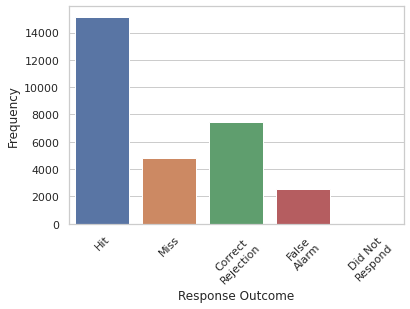

In [52]:
sns.set_theme(style = "whitegrid")
ax = sns.barplot(x="SigDetection",y="SUBJECT",data = nsdBehav_summary)
ax.set(xlabel = "Response Outcome", ylabel = "Frequency")
ax.set_xticklabels(["Hit", "Miss", "Correct\nRejection", "False\nAlarm", "Did Not\nRespond"],
                   rotation = 45)


In [56]:
### Reaction Times
nsdBehav_rtGroup = nsdBehav.groupby("SigDetection").mean("RT")
nsdBehav_rtGroup = nsdBehav_summary.reset_index(level=0)
nsdBehav_rtGroup


,index,SigDetection,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,...,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA
0,0,0,1.0,23.525618,6.686449,31.914804,36813.610814,4963.825321,163.447331,1.000000,...,1112.583546,0.079261,3809.762545,9027.097585,0.450973,0.450973,0.081240,1.024662,2.0,0.0
1,1,1,1.0,24.660940,6.024012,31.401159,36670.164148,5114.535293,171.874611,1.000000,...,1403.856236,0.038915,8578.450838,13899.124864,0.022356,0.977644,1.035189,0.039536,1.0,0.0
2,2,2,1.0,12.725891,6.289845,31.807666,36535.287021,5063.198521,89.472868,0.000000,...,1261.677573,0.015064,NaN,NaN,0.000000,1.000000,1.026631,0.015467,1.0,0.0
3,3,3,1.0,17.335027,6.851446,31.294371,37462.500000,4820.578577,122.142892,0.000000,...,1744.130276,0.294762,NaN,NaN,0.000000,0.000000,0.298671,1.023847,2.0,0.0
4,4,4,1.0,12.454545,7.909091,30.181818,29108.181818,4940.727273,88.764956,0.363636,...,NaN,NaN,4963.250000,11175.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0


In [74]:
max(nsdBehav["SESSION"])

40

In [71]:
colors = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

[Text(0, 0, 'Hit'),
 Text(1, 0, 'Miss'),
 Text(2, 0, 'Correct\nRejection'),
 Text(3, 0, 'False\nAlarm'),
 Text(4, 0, 'Did Not\nRespond')]

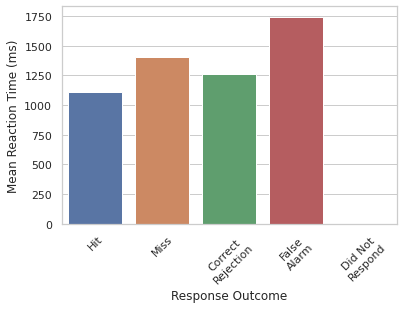

In [85]:
sns.set_palette("colorblind")
sns.set_theme(style = "whitegrid")
ax = sns.barplot(x="SigDetection",y="RT",data = nsdBehav_rtGroup)

ax.set(xlabel = "Response Outcome", ylabel = "Mean Reaction Time (ms)")
ax.set_xticklabels(["Hit", "Miss", "Correct\nRejection", "False\nAlarm", "Did Not\nRespond"],
                   rotation = 45)


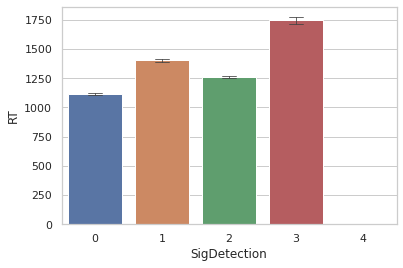

In [70]:
ax = sns.barplot(x="SigDetection", y="RT", data=nsdBehav, estimator=np.mean, ci=95, capsize=.2, errwidth = 0.8)